In [55]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt 

In [91]:
train=pd.read_csv(r'C:\Users\My PC\Desktop\Machine Learning\Kaggle\ds\lowest sale\train.csv')
test=pd.read_csv(r'C:\Users\My PC\Desktop\Machine Learning\Kaggle\ds\lowest sale\test.csv')

In [57]:
train.head()

,Item_Id,Date,State_of_Country,Market_Category,Product_Category,Grade,Demand,Low_Cap_Price,High_Cap_Price
0,IT_1,2007-07-05,0,0,0,0,0.5,2785,4240
1,IT_2,2007-07-05,0,1,0,0,0.7,3574,4756
2,IT_3,2007-07-05,0,103,0,1,1.6,5978,9669
3,IT_4,2007-07-05,0,103,0,0,0.0,5681,8313
4,IT_5,2007-07-05,0,103,0,2,0.0,4924,7257


In [58]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9798 entries, 0 to 9797
Data columns (total 9 columns):
Item_Id             9798 non-null object
Date                9798 non-null object
State_of_Country    9798 non-null int64
Market_Category     9798 non-null int64
Product_Category    9798 non-null int64
Grade               9798 non-null int64
Demand              9798 non-null float64
Low_Cap_Price       9798 non-null int64
High_Cap_Price      9798 non-null int64
dtypes: float64(1), int64(6), object(2)
memory usage: 689.0+ KB


In [59]:
train['year']=pd.DatetimeIndex(train['Date']).year

In [60]:
train['month']=pd.DatetimeIndex(train['Date']).month

In [62]:
train.drop('Item_Id',axis=1,inplace=True)

In [63]:
train.drop('Date',axis=1,inplace=True)

In [64]:
train.head()

,State_of_Country,Market_Category,Product_Category,Grade,Demand,Low_Cap_Price,High_Cap_Price,year,month
0,0,0,0,0,0.5,2785,4240,2007,7
1,0,1,0,0,0.7,3574,4756,2007,7
2,0,103,0,1,1.6,5978,9669,2007,7
3,0,103,0,0,0.0,5681,8313,2007,7
4,0,103,0,2,0.0,4924,7257,2007,7


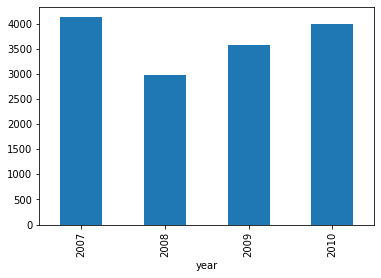

In [47]:
train['Low_Cap_Price'].groupby(train.year).mean().plot.bar()
# train.groupby('year')['Count'].mean().plot.bar()

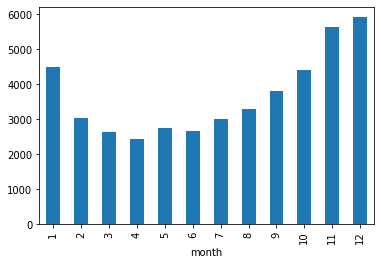

In [49]:
train['Low_Cap_Price'].groupby(train.month).mean().plot.bar()

In [84]:
test.head()

,Date,State_of_Country,Market_Category,Product_Category,Grade,Demand,High_Cap_Price
0,2014-01-19,0,3,0,0,0.1,5303
1,2014-01-19,0,268,0,2,1.4,10492
2,2014-01-19,0,320,0,0,13.4,24706
3,2014-01-19,17,358,0,3,5.5,23464
4,2014-01-19,18,23,5,2,0.0,6222


In [86]:
test['year']=pd.DatetimeIndex(test['Date']).year
test['month']=pd.DatetimeIndex(test['Date']).month


In [87]:
test.drop('Date',axis=1,inplace=True)

In [88]:
test.head()

,State_of_Country,Market_Category,Product_Category,Grade,Demand,High_Cap_Price,year,month
0,0,3,0,0,0.1,5303,2014,1
1,0,268,0,2,1.4,10492,2014,1
2,0,320,0,0,13.4,24706,2014,1
3,17,358,0,3,5.5,23464,2014,1
4,18,23,5,2,0.0,6222,2014,1


In [32]:
X=train[['State_of_Country','Market_Category','Product_Category','Grade','Demand','High_Cap_Price','year','month']]
Y=train['Low_Cap_Price']

In [34]:
Y.head()

0    2785
1    3574
2    5978
3    5681
4    4924
Name: Low_Cap_Price, dtype: int64

In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=143)

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
reg = linear_model.Lasso(alpha=0.1)
from sklearn.metrics import accuracy_score

In [66]:
reg1=LogisticRegression()

In [75]:
reg.fit(x_train,y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [76]:
pred1=reg.predict(x_test)


In [79]:
pred1=(pred1>0)

In [80]:
from sklearn.metrics import mean_squared_log_error
print((mean_squared_log_error( y_test, pred1)))

52.805988047418374


In [89]:
pred_f=reg.predict(test)

In [90]:
pred_f

array([ 2075.65459119,  3679.43105071, 10447.08230451, ...,
        6209.67258676,  5628.67781426,  6850.26625721])

In [94]:
sub=pd.DataFrame({'Item_Id':test.Item_Id,
                 'Low_Cap_Price':pred_f})

In [96]:
sub.to_csv(r'C:\Users\My PC\Desktop\Machine Learning\Kaggle\ds\lowest sale\sub.csv',index=False)